In [76]:
%matplotlib inline
import pandas as pd
import visualization as vis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76678 entries, 0 to 96039
Data columns (total 26 columns):
order_products_value          76678 non-null float64
order_freight_value           76678 non-null float64
order_items_qty               76678 non-null int64
product_description_lenght    76678 non-null int64
review_comment_message        76678 non-null float64
approval_time                 76678 non-null float64
delivery_delay                76678 non-null float64
review_time                   76678 non-null float64
lat                           76678 non-null float64
lng                           76678 non-null float64
seller_lat                    76678 non-null float64
seller_lng                    76678 non-null float64
product_weight_g              76678 non-null float64
product_length_cm             76678 non-null float64
product_height_cm             76678 non-null float64
product_width_cm              76678 non-null float64
review_score_1                76678 non-null in

/Users/sun/Desktop/Dev/R/MSE226/Project/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


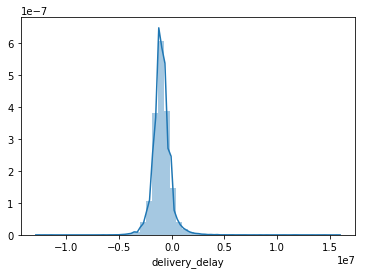

In [88]:
data = pd.read_pickle('./CleanedData/dataset_train.pkl')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.info()

vis.histogram(data, "delivery_delay")

In [ ]:
target = []
for i in range(len())

### Classification Task

Target:review score

In [78]:
x = data.loc[:, ["review_score_1", "review_score_2", "review_score_3",
                 "review_score_4", "review_score_5"]].stack()
review_scores = pd.Series(pd.Categorical(x[x != 0].index.get_level_values(1)))
target = []
for i in range(len(review_scores)):
    n = review_scores[i][-1]
    target.append(int(n))
data = data.assign(target=target)
data.drop(columns=["review_score_1", "review_score_2", "review_score_3", "review_score_4", "review_score_5"],
          inplace=True)

/Users/sun/Desktop/Dev/R/MSE226/Project/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


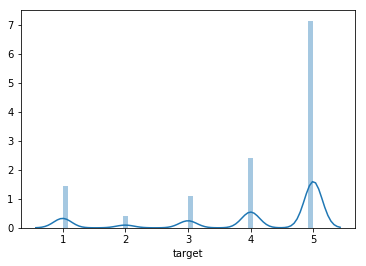

In [79]:
vis.histogram(data, "target")

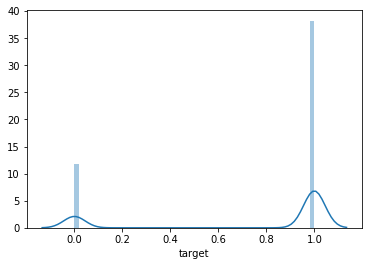

In [80]:
target = []
for i in data.loc[:, "target"]:
    if i >= 4:
        target.append(1)
    else:
        target.append(0)
data = data.assign(target=target)
vis.histogram(data, "target")

### Covariates groups
#### 1. Localization and transportation costs
- order_freight_value numeric
- product_weight_g numeric
- delivery_delay numeric
- lat numeric
- lng numeric
- seller_lat numeric
- seller_lng numeric
- order_products_value
- order_items_qty

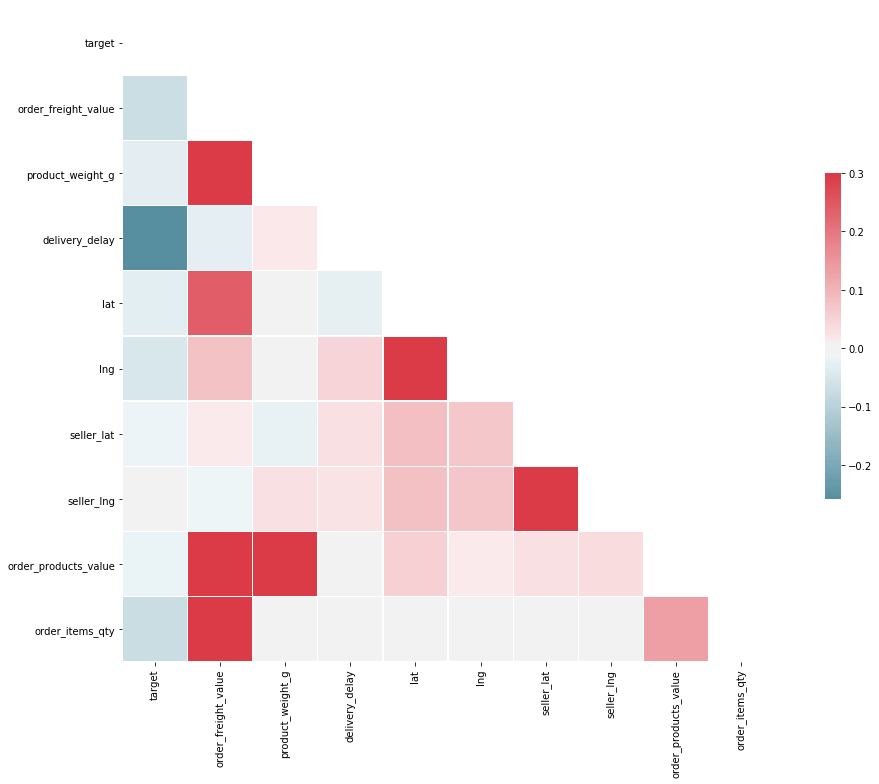

In [81]:
covariates_names = ['order_freight_value', 'product_weight_g', 'delivery_delay',
                    'lat', 'lng', 'seller_lat', 'seller_lng', 'order_products_value', 'order_items_qty']
vis.correlation_matrix(data.loc[:, ['target'] + covariates_names])

Computing regularization path using the coordinate descent lasso...


240.51065066981644 is the alpha parameter retained for Lasso


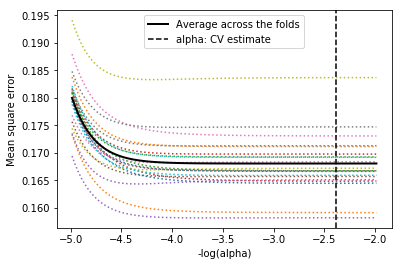

In [83]:
from FeaturesClassification import lookup_best_alpha
selected_alpha = lookup_best_alpha(data, data.loc[:, 'target'].values)

In [84]:
from FeaturesClassification import lasso_pruning

features_to_drop = lasso_pruning(4000, data, data.loc[:, 'target'].values)

for feature in list(data.columns):
    if feature in features_to_drop:
        continue
    else:
        print(feature)


21 features dropped out of 22
delivery_delay


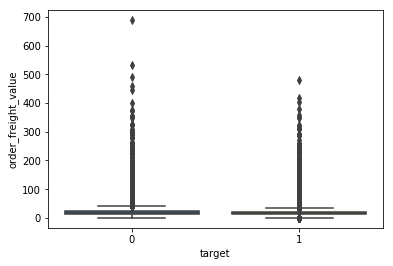

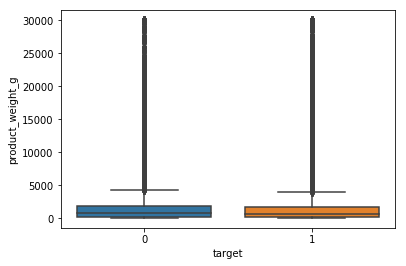

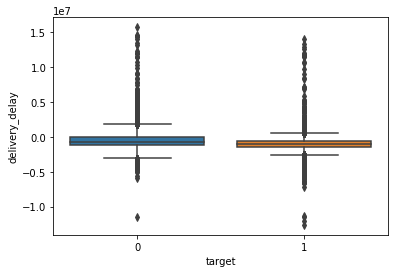

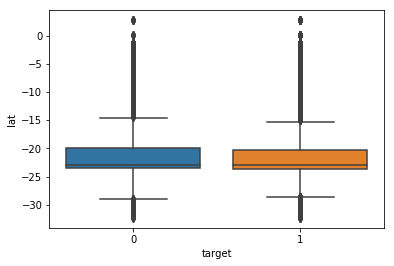

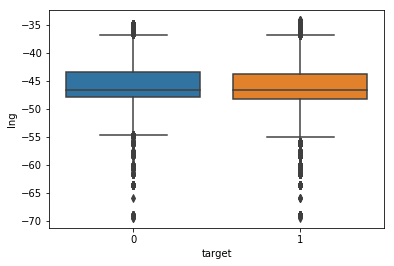

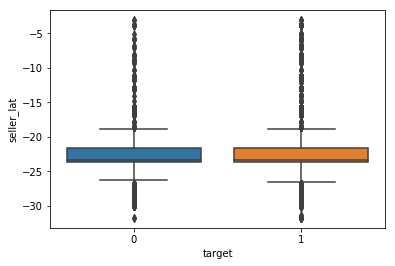

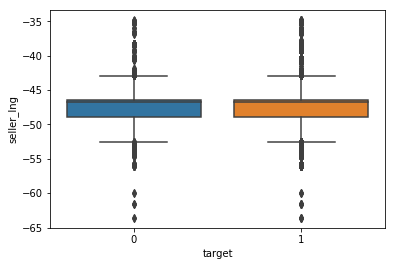

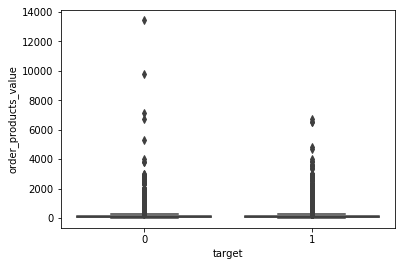

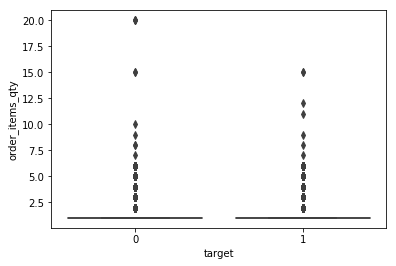

[None, None, None, None, None, None, None, None, None]

In [74]:
[vis.box_plots(data, 'target', cov_name) for cov_name in covariates_names]

#### 2. Feedback
- review_time numeric
- review_comment_message numeric
- comment__False category
- comment__True category

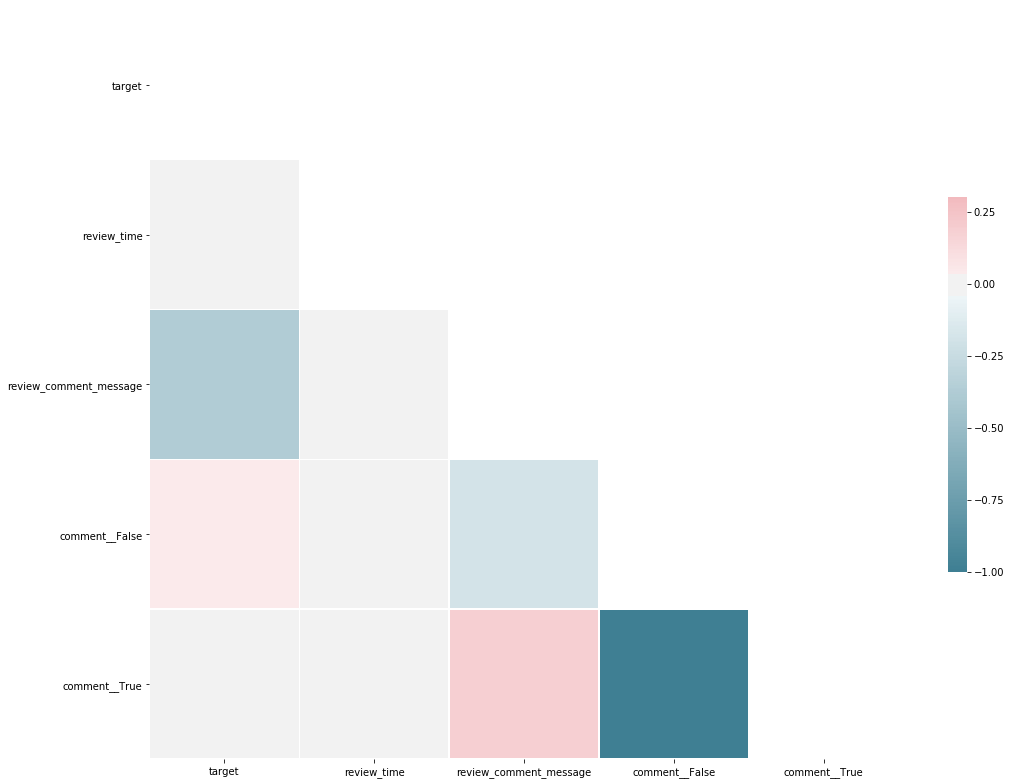

In [75]:
covariates_names = ['review_time', 'review_comment_message', 'comment__False', 'comment__True']
vis.correlation_matrix(data.loc[:, ['target'] + covariates_names])

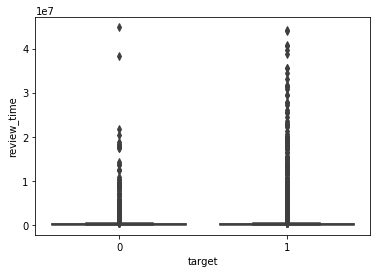

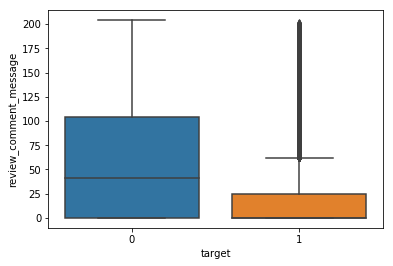

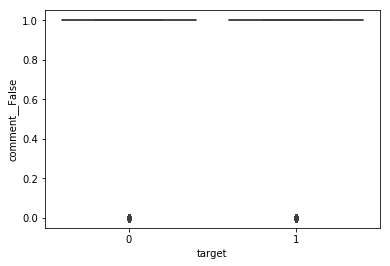

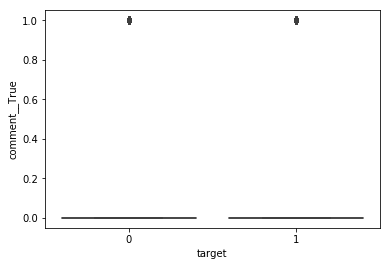

[None, None, None, None]

In [31]:
[vis.box_plots(data, 'target', cov_name) for cov_name in covariates_names]

#### 3. Care about product description
- product_description_lenght numeric
- product_photos_qty_0 category
- product_photos_qty_1 category
- product_photos_qty_2 category

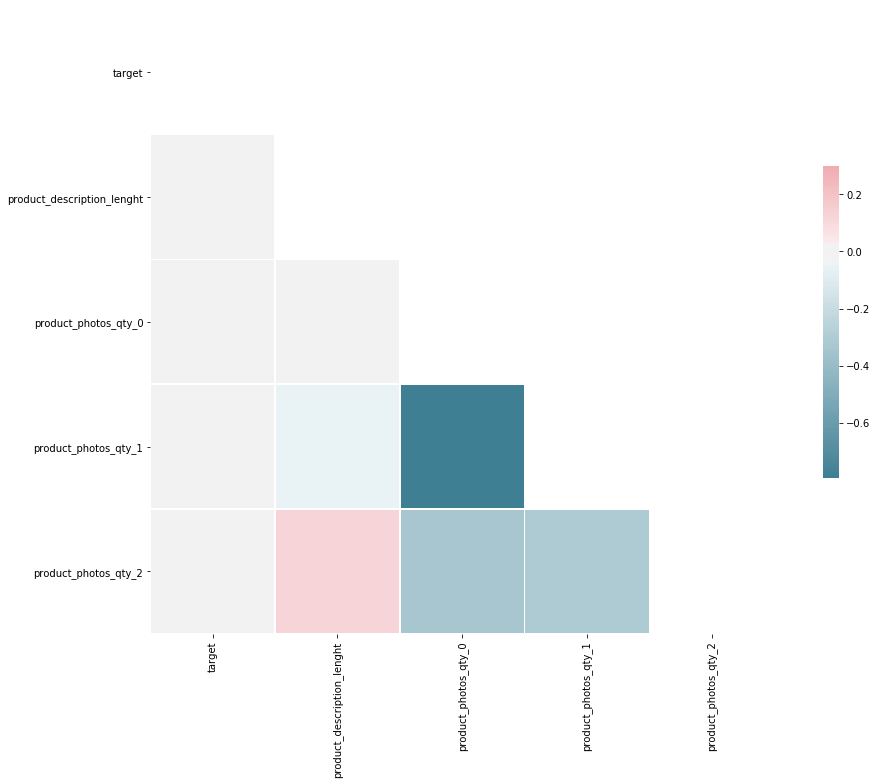

In [52]:
covariates_names = ['product_description_lenght', 'product_photos_qty_0', 
                    'product_photos_qty_1', 'product_photos_qty_2']
vis.correlation_matrix(data.loc[:, ['target'] + covariates_names])

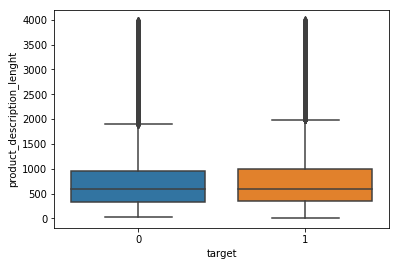

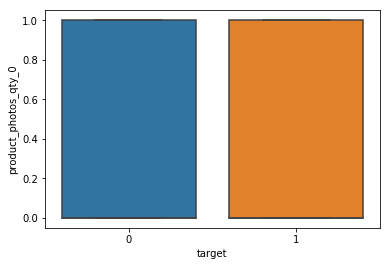

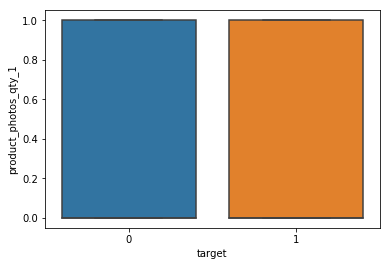

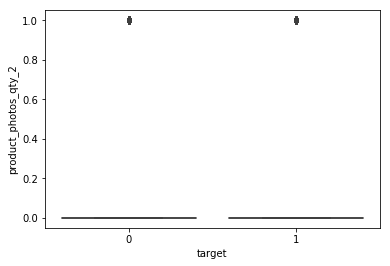

[None, None, None, None]

In [35]:
[vis.box_plots(data, 'target', cov_name) for cov_name in covariates_names]

#### 4. Product dimensions
- product_weight_g numeric
- product_length_cm numeric
- product_height_cm numeric
- product_width_cm numeric

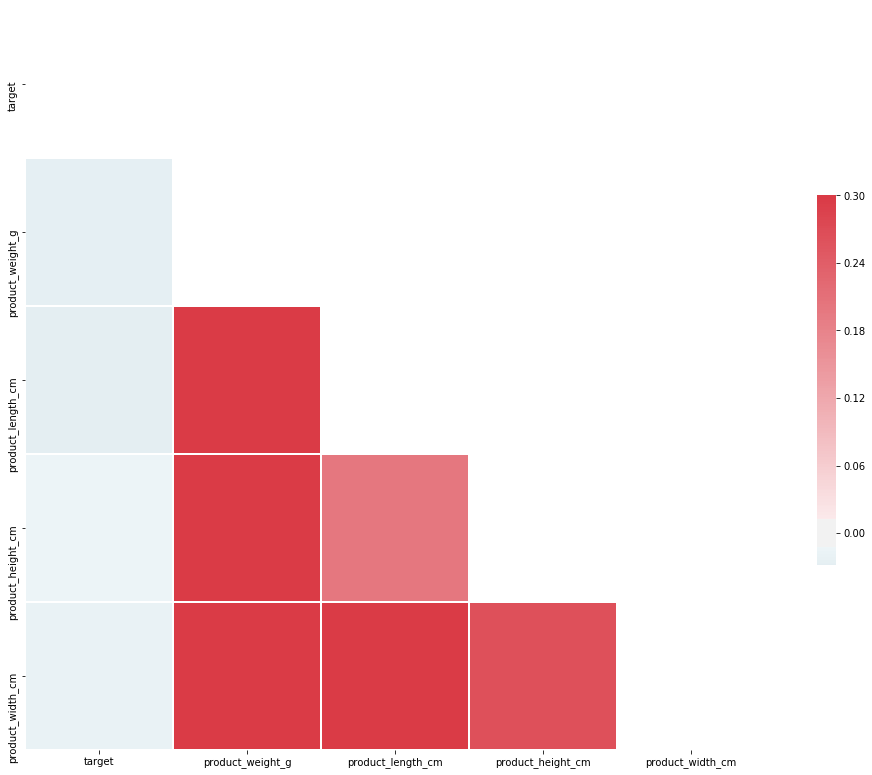

In [53]:
covariates_names = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
vis.correlation_matrix(data.loc[:, ['target'] + covariates_names])

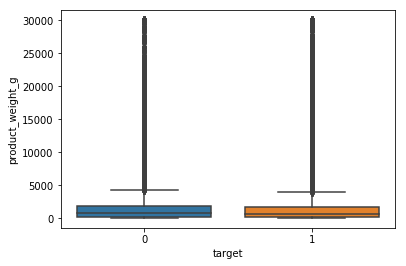

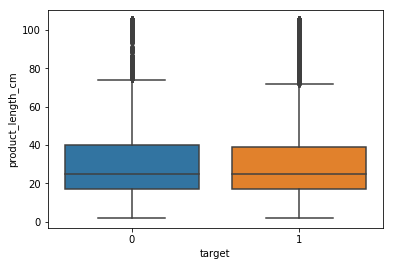

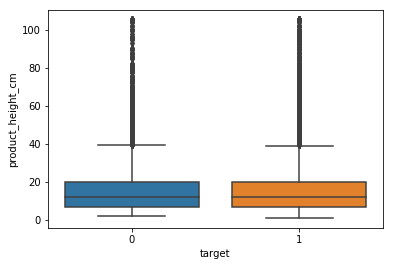

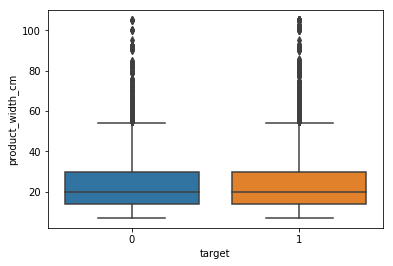

[None, None, None, None]

In [38]:
[vis.box_plots(data, 'target', cov_name) for cov_name in covariates_names]

#### 5. Processing time
- approval_time numeric
- delivery_delay numeric

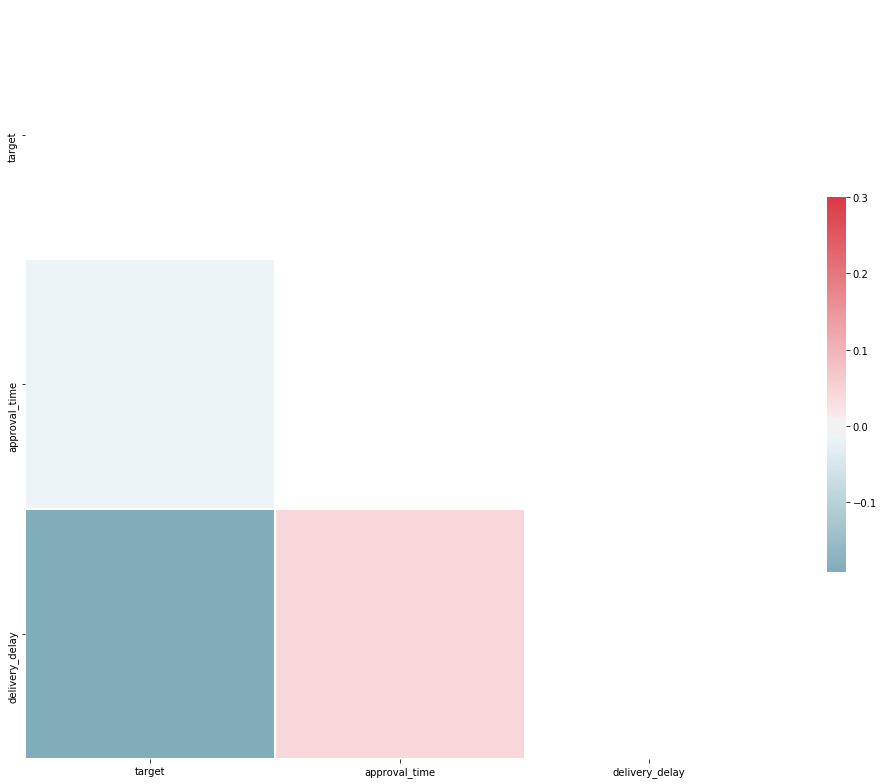

In [54]:
covariates_names = ['approval_time', 'delivery_delay']
vis.correlation_matrix(data.loc[:, ['target'] + covariates_names])

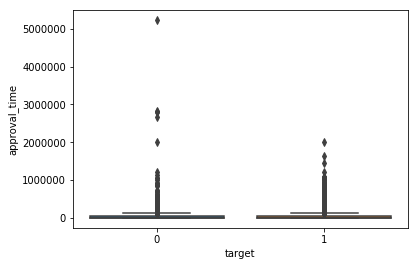

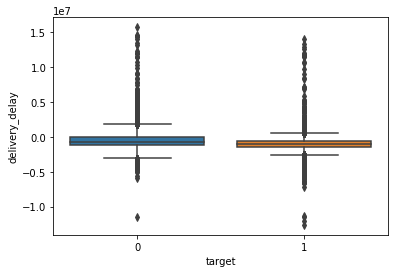

[None, None]

In [41]:
[vis.box_plots(data, 'target', cov_name) for cov_name in covariates_names]